In [2]:
%pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 3.6 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.6 MB 3.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.6 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.6 MB 7.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/11.6 MB 7.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.6 MB 8.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.6 MB 8.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.6 MB 7.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.6 MB 9.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.6 MB 9.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.4/11.6 MB 9.7 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


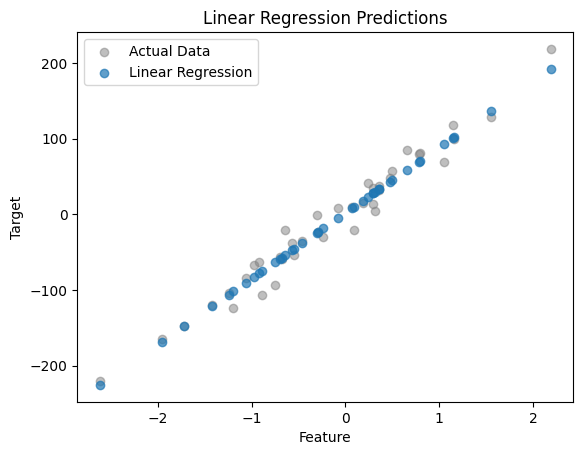

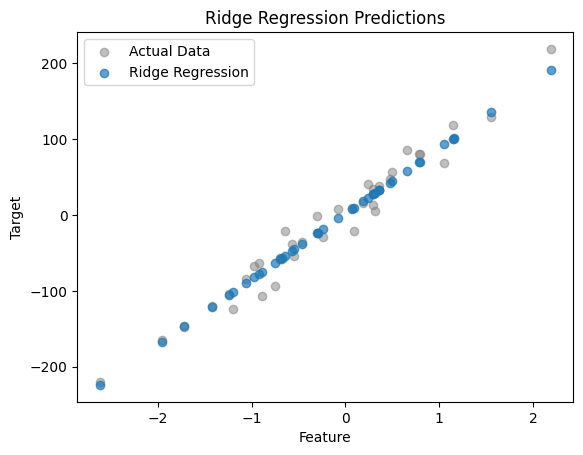

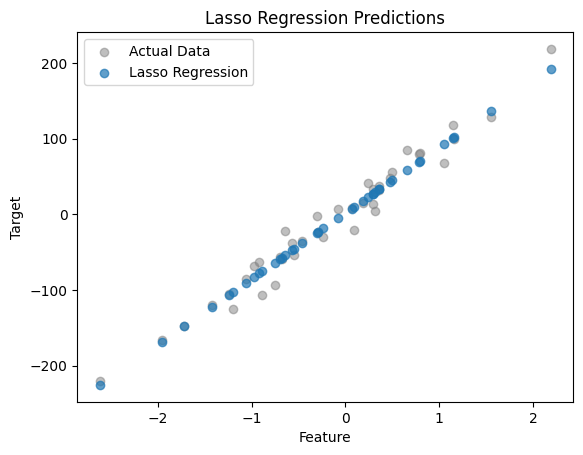

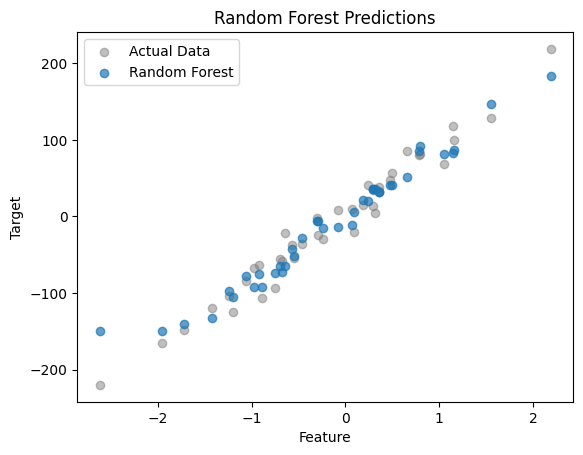

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Генеруємо випадковий набір даних для регресії
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Список моделей для тестування
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Збереження результатів
results = {}

# Навчання та оцінка кожної моделі
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Обчислення метрик
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R2 Score": r2}
    
    # Побудова графіка
    plt.scatter(X_test, y_test, color='gray', label="Actual Data", alpha=0.5)
    plt.scatter(X_test, y_pred, label=name, alpha=0.7)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"{name} Predictions")
    plt.legend()
    plt.show()


In [4]:

# Відображення таблиці з результатами
df_results = pd.DataFrame(results).T
df_results


,MSE,R2 Score
Linear Regression,246.121793,0.968085
Ridge Regression,248.485451,0.967779
Lasso Regression,246.499305,0.968036
Random Forest,460.785774,0.940250
